Find the markdown blocks that say interaction required! The notebook should take care of the rest!

# Import libs

In [1]:
import sys
import os
sys.path.append('..')
from eflow.foundation import DataPipeline,DataFrameTypes
from eflow.model_analysis import ClassificationAnalysis
from eflow.utils.modeling_utils import optimize_model_grid
from eflow.utils.eflow_utils import get_type_holder_from_pipeline, remove_unconnected_pipeline_segments
from eflow.utils.pandas_utils import data_types_table
from eflow.auto_modeler import AutoCluster
from eflow.data_pipeline_segments import DataEncoder

import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import copy
import pickle
import time
import math
import multiprocessing as mp
from functools import partial
from scipy import stats
from IPython.display import clear_output

In [2]:
# # Additional add ons
# !pip install pandasgui
# !pip install pivottablejs
# clear_output()

In [3]:
%matplotlib notebook
%matplotlib inline

## Declare Project Variables

### Interaction required

In [4]:
dataset_path = "Datasets/titanic_train.csv"

# -----
dataset_name = "Titanic Data"
pipeline_name = "Titanic Pipeline"

# -----


# -----
notebook_mode = True

## Clean out segment space

In [5]:
remove_unconnected_pipeline_segments()

# Import dataset

In [6]:
df = pd.read_csv(dataset_path)
shape_df = pd.DataFrame.from_dict({'Rows': [df.shape[0]],
                                   'Columns': [df.shape[1]]})
display(shape_df)
display(df.head(30))

,Rows,Columns
0,891,12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
data_types_table(df)

,Data Types
Features,
Age,float64
Fare,float64
PassengerId,int64
Survived,int64
Pclass,int64
SibSp,int64
Parch,int64
Name,object
Sex,object


# Loading and init df_features

In [8]:
# Option: 1
# df_features = get_type_holder_from_pipeline(pipeline_name)

In [9]:
# Option: 2
df_features = DataFrameTypes()
df_features.init_on_json_file(os.getcwd() + f"/eflow Data/{dataset_name}/df_features.json")

In [10]:
df_features.display_features(display_dataframes=True,
                             notebook_mode=notebook_mode)

,Data Types
Features,
Pclass,string
Sex,string
Embarked,string
Cabin,string
Survived,bool
SibSp,integer
Parch,integer
Fare,float
Age,float


# Any extra processing before eflow DataPipeline

# Setup pipeline structure

### Interaction Required

In [11]:
main_pipe = DataPipeline(pipeline_name,
                         df,
                         df_features)

The file 'root_pipeline.json' exist!
Now configuring object with proper pipeline segments...
Removing the feature: "PassengerId"
Removing the feature: "Name"
Removing the feature: "Ticket"


In [12]:
main_pipe.perform_pipeline(df,
                           df_features)

In [13]:
df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Sex_female,Sex_male
0,0,22.000000,1,0,7.2500,False,False,True,False,False,True,False,True
1,1,38.000000,1,0,71.2833,True,False,False,True,False,False,True,False
2,1,26.000000,0,0,7.9250,False,False,True,False,False,True,True,False
3,1,35.000000,1,0,53.1000,True,False,False,False,False,True,True,False
4,0,35.000000,0,0,8.0500,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,False,True,False,False,False,True,False,True
887,1,19.000000,0,0,30.0000,True,False,False,False,False,True,True,False
888,0,28.312774,1,2,23.4500,False,False,True,False,False,True,True,False
889,1,26.000000,0,0,30.0000,True,False,False,True,False,False,False,True


In [14]:
qualitative_features = list(df_features.get_dummy_encoded_features().keys())

# Generate clustering models with automodeler (and find any other models in the directory structure)


Inspecting scaled results!


,Mean,Standard Dev
Survived,3.987333e-17,1.0
Age,-4.944293e-16,1.0
SibSp,4.386066e-17,1.0
Parch,5.382900e-17,1.0
Fare,3.987333e-18,1.0
Pclass_1,-7.575933e-17,1.0
Pclass_2,1.993666e-17,1.0
Pclass_3,-6.778466e-17,1.0
Embarked_Cherbourg,-1.993666e-17,1.0
Embarked_Queenstown,0.000000e+00,1.0


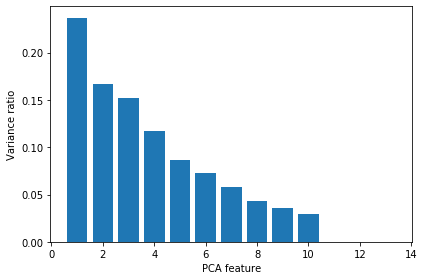

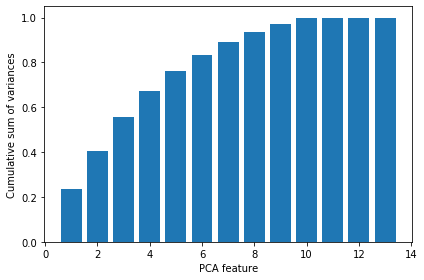


Inspecting applied scaler and pca results!


,Mean,Standard Dev
PCA_Feature_1,-1.594933e-17,1.755623e+00
PCA_Feature_2,-7.177199e-17,1.473689e+00
PCA_Feature_3,-3.189866e-17,1.404598e+00
PCA_Feature_4,-3.588600e-17,1.236644e+00
PCA_Feature_5,-2.791133e-17,1.062925e+00
PCA_Feature_6,-5.980999e-18,9.733969e-01
PCA_Feature_7,4.386066e-17,8.676079e-01
PCA_Feature_8,1.594933e-17,7.507034e-01
PCA_Feature_9,6.180366e-17,6.864172e-01
PCA_Feature_10,-6.977833e-17,6.156816e-01


After applying pca with a cutoff percentage 0.8% for the cumulative index. Using features 1 to 6
Old shape (891, 13)
New shape (891, 6)

Inspecting data after final scaler applied!


,Mean,Standard Dev
PCA_Feature_1,-3.987333e-18,1.0
PCA_Feature_2,-1.594933e-17,1.0
PCA_Feature_3,-4.984166e-18,1.0
PCA_Feature_4,-1.395567e-17,1.0
PCA_Feature_5,-3.987333e-18,1.0
PCA_Feature_6,5.980999e-18,1.0


Found past models in directory structure! Attempting to re-initalize models...
Center points was found at /Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/Somsc/Clusters=7/Center points.pkl

K-Means_Clusters=6 was found at /Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/K-Means/Clusters=6/K-Means_Clusters=6.pkl

K-Means_Clusters=5 was found at /Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/K-Means/Clusters=5/K-Means_Clusters=5.pkl

K-Means_Clusters=7 was found at /Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/K-Means/Clusters=7/K-Means_Clusters=7.pkl

K-Medians_Clusters=6 was found at

In [15]:
auto_cluster = AutoCluster(df,
                           project_sub_dir=dataset_name,
                           overwrite_full_path=None,
                           notebook_mode=True,
                           pca_perc=.8)

# Inspect Hierarchical models

In [16]:
# auto_cluster.visualize_hierarchical_clustering()

In [17]:
# auto_cluster.create_elbow_models(sequences=10,
#                                  max_k_value=11,
#                                  display_visuals=True)

## Remove Scaled data to save space(not needed but it helps)

In [18]:
auto_cluster.delete_scaled_data()

In [19]:
auto_cluster.evaluate_model(model_name="Somsc_Clusters=5",
                            df=df,
                            df_features=df_features,
                            qualitative_features=qualitative_features,
                            zscore=[1.5,None])

Model Name: Somsc_Clusters=5
Clusters: 5
Distance Zscore: 1.5

Feature Analysis on cluster 0


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Sex_female,Sex_male
0,1,55.000000,0,0,16.0,False,True,False,False,False,True,True,False
1,1,28.312774,0,0,13.0,False,True,False,False,False,True,False,True
2,0,35.000000,0,0,26.0,False,True,False,False,False,True,False,True
3,1,34.000000,0,0,13.0,False,True,False,False,False,True,False,True
4,0,66.000000,0,0,10.5,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,24.000000,0,0,13.0,False,True,False,False,False,True,False,True
161,1,42.000000,0,0,13.0,False,True,False,False,False,True,True,False
162,1,25.000000,0,1,26.0,False,True,False,False,False,True,True,False
163,0,28.000000,0,0,10.5,False,True,False,False,False,True,False,True


,Survived,Age,SibSp,Parch,Fare,Pclass,Embarked,Sex
0,1,55.0,0,0,16.0,2,Southampton,female
2,0,35.0,0,0,26.0,2,Southampton,male
4,0,66.0,0,0,10.5,2,Southampton,male
6,1,29.0,1,0,26.0,2,Southampton,female
7,1,21.0,0,0,10.5,2,Southampton,female
...,...,...,...,...,...,...,...,...
160,0,24.0,0,0,13.0,NaN,NaN,NaN
161,1,42.0,0,0,13.0,NaN,NaN,NaN
162,1,25.0,0,1,26.0,NaN,NaN,NaN
163,0,28.0,0,0,10.5,NaN,NaN,NaN


Survived     0
Age          0
SibSp        0
Parch        0
Fare         0
Pclass      15
Embarked    15
Sex         15
dtype: int64

Feature Analysis on cluster 1


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Sex_female,Sex_male
0,1,38.000000,1,0,71.2833,True,False,False,True,False,False,True,False
1,1,14.000000,1,0,30.0708,False,True,False,True,False,False,True,False
2,1,28.312774,0,0,7.2250,False,False,True,True,False,False,True,False
3,0,28.312774,0,0,7.2250,False,False,True,True,False,False,False,True
4,0,40.000000,0,0,27.7208,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,1,27.000000,1,0,13.8583,False,True,False,True,False,False,True,False
159,1,28.000000,1,0,24.0000,False,True,False,True,False,False,True,False
160,1,15.000000,0,0,7.2250,False,False,True,True,False,False,True,False
161,1,56.000000,0,1,83.1583,True,False,False,True,False,False,True,False


,Survived,Age,SibSp,Parch,Fare,Pclass,Embarked,Sex
0,1,38.000000,1,0,71.2833,1,Cherbourg,female
1,1,14.000000,1,0,30.0708,2,Cherbourg,female
2,1,28.312774,0,0,7.2250,3,Cherbourg,female
3,0,28.312774,0,0,7.2250,3,Cherbourg,male
4,0,40.000000,0,0,27.7208,1,Cherbourg,male
...,...,...,...,...,...,...,...,...
157,0,28.312774,0,0,7.2292,NaN,NaN,NaN
158,1,27.000000,1,0,13.8583,NaN,NaN,NaN
159,1,28.000000,1,0,24.0000,NaN,NaN,NaN
160,1,15.000000,0,0,7.2250,NaN,NaN,NaN


Survived     0
Age          0
SibSp        0
Parch        0
Fare         0
Pclass      12
Embarked    12
Sex         12
dtype: int64

Feature Analysis on cluster 2


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Sex_female,Sex_male
0,0,22.000000,1,0,7.2500,False,False,True,False,False,True,False,True
1,1,26.000000,0,0,7.9250,False,False,True,False,False,True,True,False
2,0,35.000000,0,0,8.0500,False,False,True,False,False,True,False,True
3,0,2.000000,3,1,21.0750,False,False,True,False,False,True,False,True
4,1,27.000000,0,2,11.1333,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,28.312774,0,0,7.8958,False,False,True,False,False,True,False,True
348,0,33.000000,0,0,7.8958,False,False,True,False,False,True,False,True
349,0,22.000000,0,0,10.5167,False,False,True,False,False,True,True,False
350,0,25.000000,0,0,7.0500,False,False,True,False,False,True,False,True


,Survived,Age,SibSp,Parch,Fare,Pclass,Embarked,Sex
0,0,22.000000,1,0,7.2500,3,Southampton,male
1,1,26.000000,0,0,7.9250,3,Southampton,female
2,0,35.000000,0,0,8.0500,3,Southampton,male
3,0,2.000000,3,1,21.0750,3,Southampton,male
4,1,27.000000,0,2,11.1333,3,Southampton,female
...,...,...,...,...,...,...,...,...
347,0,28.312774,0,0,7.8958,NaN,NaN,NaN
348,0,33.000000,0,0,7.8958,NaN,NaN,NaN
349,0,22.000000,0,0,10.5167,NaN,NaN,NaN
350,0,25.000000,0,0,7.0500,NaN,NaN,NaN


Survived     0
Age          0
SibSp        0
Parch        0
Fare         0
Pclass      26
Embarked    26
Sex         26
dtype: int64

Feature Analysis on cluster 3


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Sex_female,Sex_male
0,1,35.0,1,0,53.1000,True,False,False,False,False,True,True,False
1,0,54.0,0,0,51.8625,True,False,False,False,False,True,False,True
2,1,58.0,0,0,26.5500,True,False,False,False,False,True,True,False
3,1,28.0,0,0,35.5000,True,False,False,False,False,True,False,True
4,0,19.0,3,2,263.0000,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1,48.0,0,0,25.9292,True,False,False,False,False,True,True,False
130,0,31.0,0,0,50.4958,True,False,False,False,False,True,False,True
131,1,47.0,1,1,52.5542,True,False,False,False,False,True,True,False
132,0,33.0,0,0,5.0000,True,False,False,False,False,True,False,True


,Survived,Age,SibSp,Parch,Fare,Pclass,Embarked,Sex
0,1,35.0,1,0,53.1000,1,Southampton,female
1,0,54.0,0,0,51.8625,1,Southampton,male
2,1,58.0,0,0,26.5500,1,Southampton,female
3,1,28.0,0,0,35.5000,1,Southampton,male
5,0,42.0,1,0,52.0000,1,Southampton,male
...,...,...,...,...,...,...,...,...
129,1,48.0,0,0,25.9292,NaN,NaN,NaN
130,0,31.0,0,0,50.4958,NaN,NaN,NaN
131,1,47.0,1,1,52.5542,NaN,NaN,NaN
132,0,33.0,0,0,5.0000,NaN,NaN,NaN


Survived     0
Age          0
SibSp        0
Parch        0
Fare         0
Pclass      11
Embarked    11
Sex         11
dtype: int64

Feature Analysis on cluster 4


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Sex_female,Sex_male
0,0,28.312774,0,0,8.4583,False,False,True,False,True,False,False,True
1,0,2.000000,4,1,29.1250,False,False,True,False,True,False,False,True
2,1,15.000000,0,0,8.0292,False,False,True,False,True,False,True,False
3,1,28.312774,0,0,7.8792,False,False,True,False,True,False,True,False
4,1,28.312774,0,0,7.7500,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0,28.312774,0,0,7.7500,False,False,True,False,True,False,False,True
73,0,28.312774,0,0,6.9500,False,False,True,False,True,False,False,True
74,1,28.312774,0,0,7.7500,False,False,True,False,True,False,False,True
75,0,39.000000,0,5,29.1250,False,False,True,False,True,False,True,False


,Survived,Age,SibSp,Parch,Fare,Pclass,Embarked,Sex
0,0,28.312774,0,0,8.4583,3,Queenstown,male
2,1,15.000000,0,0,8.0292,3,Queenstown,female
3,1,28.312774,0,0,7.8792,3,Queenstown,female
4,1,28.312774,0,0,7.7500,3,Queenstown,female
5,1,19.000000,0,0,7.8792,3,Queenstown,female
...,...,...,...,...,...,...,...,...
70,0,28.312774,0,0,7.7375,NaN,NaN,NaN
72,0,28.312774,0,0,7.7500,NaN,NaN,NaN
73,0,28.312774,0,0,6.9500,NaN,NaN,NaN
74,1,28.312774,0,0,7.7500,NaN,NaN,NaN


Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
Pclass      7
Embarked    7
Sex         7
dtype: int64

############
Model Name: Somsc_Clusters=5
Clusters: 5
Distance Zscore: inf

Feature Analysis on cluster 0


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Sex_female,Sex_male
0,1,55.000000,0,0,16.0,False,True,False,False,False,True,True,False
1,1,28.312774,0,0,13.0,False,True,False,False,False,True,False,True
2,0,35.000000,0,0,26.0,False,True,False,False,False,True,False,True
3,1,34.000000,0,0,13.0,False,True,False,False,False,True,False,True
4,0,66.000000,0,0,10.5,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,24.000000,0,0,13.0,False,True,False,False,False,True,False,True
161,1,42.000000,0,0,13.0,False,True,False,False,False,True,True,False
162,1,25.000000,0,1,26.0,False,True,False,False,False,True,True,False
163,0,28.000000,0,0,10.5,False,True,False,False,False,True,False,True


,Survived,Age,SibSp,Parch,Fare,Pclass,Embarked,Sex
0,1,55.000000,0,0,16.0,2,Southampton,female
1,1,28.312774,0,0,13.0,2,Southampton,male
2,0,35.000000,0,0,26.0,2,Southampton,male
3,1,34.000000,0,0,13.0,2,Southampton,male
4,0,66.000000,0,0,10.5,2,Southampton,male
...,...,...,...,...,...,...,...,...
160,0,24.000000,0,0,13.0,2,Southampton,male
161,1,42.000000,0,0,13.0,2,Southampton,female
162,1,25.000000,0,1,26.0,2,Southampton,female
163,0,28.000000,0,0,10.5,2,Southampton,male


Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
Pclass      0
Embarked    0
Sex         0
dtype: int64

Feature Analysis on cluster 1


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Sex_female,Sex_male
0,1,38.000000,1,0,71.2833,True,False,False,True,False,False,True,False
1,1,14.000000,1,0,30.0708,False,True,False,True,False,False,True,False
2,1,28.312774,0,0,7.2250,False,False,True,True,False,False,True,False
3,0,28.312774,0,0,7.2250,False,False,True,True,False,False,False,True
4,0,40.000000,0,0,27.7208,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,1,27.000000,1,0,13.8583,False,True,False,True,False,False,True,False
159,1,28.000000,1,0,24.0000,False,True,False,True,False,False,True,False
160,1,15.000000,0,0,7.2250,False,False,True,True,False,False,True,False
161,1,56.000000,0,1,83.1583,True,False,False,True,False,False,True,False


,Survived,Age,SibSp,Parch,Fare,Pclass,Embarked,Sex
0,1,38.000000,1,0,71.2833,1,Cherbourg,female
1,1,14.000000,1,0,30.0708,2,Cherbourg,female
2,1,28.312774,0,0,7.2250,3,Cherbourg,female
3,0,28.312774,0,0,7.2250,3,Cherbourg,male
4,0,40.000000,0,0,27.7208,1,Cherbourg,male
...,...,...,...,...,...,...,...,...
158,1,27.000000,1,0,13.8583,2,Cherbourg,female
159,1,28.000000,1,0,24.0000,2,Cherbourg,female
160,1,15.000000,0,0,7.2250,3,Cherbourg,female
161,1,56.000000,0,1,83.1583,1,Cherbourg,female


Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
Pclass      0
Embarked    0
Sex         0
dtype: int64

Feature Analysis on cluster 2


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Sex_female,Sex_male
0,0,22.000000,1,0,7.2500,False,False,True,False,False,True,False,True
1,1,26.000000,0,0,7.9250,False,False,True,False,False,True,True,False
2,0,35.000000,0,0,8.0500,False,False,True,False,False,True,False,True
3,0,2.000000,3,1,21.0750,False,False,True,False,False,True,False,True
4,1,27.000000,0,2,11.1333,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,28.312774,0,0,7.8958,False,False,True,False,False,True,False,True
348,0,33.000000,0,0,7.8958,False,False,True,False,False,True,False,True
349,0,22.000000,0,0,10.5167,False,False,True,False,False,True,True,False
350,0,25.000000,0,0,7.0500,False,False,True,False,False,True,False,True


,Survived,Age,SibSp,Parch,Fare,Pclass,Embarked,Sex
0,0,22.000000,1,0,7.2500,3,Southampton,male
1,1,26.000000,0,0,7.9250,3,Southampton,female
2,0,35.000000,0,0,8.0500,3,Southampton,male
3,0,2.000000,3,1,21.0750,3,Southampton,male
4,1,27.000000,0,2,11.1333,3,Southampton,female
...,...,...,...,...,...,...,...,...
347,0,28.312774,0,0,7.8958,3,Southampton,male
348,0,33.000000,0,0,7.8958,3,Southampton,male
349,0,22.000000,0,0,10.5167,3,Southampton,female
350,0,25.000000,0,0,7.0500,3,Southampton,male


Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
Pclass      0
Embarked    0
Sex         0
dtype: int64

Feature Analysis on cluster 3


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Sex_female,Sex_male
0,1,35.0,1,0,53.1000,True,False,False,False,False,True,True,False
1,0,54.0,0,0,51.8625,True,False,False,False,False,True,False,True
2,1,58.0,0,0,26.5500,True,False,False,False,False,True,True,False
3,1,28.0,0,0,35.5000,True,False,False,False,False,True,False,True
4,0,19.0,3,2,263.0000,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1,48.0,0,0,25.9292,True,False,False,False,False,True,True,False
130,0,31.0,0,0,50.4958,True,False,False,False,False,True,False,True
131,1,47.0,1,1,52.5542,True,False,False,False,False,True,True,False
132,0,33.0,0,0,5.0000,True,False,False,False,False,True,False,True


,Survived,Age,SibSp,Parch,Fare,Pclass,Embarked,Sex
0,1,35.0,1,0,53.1000,1,Southampton,female
1,0,54.0,0,0,51.8625,1,Southampton,male
2,1,58.0,0,0,26.5500,1,Southampton,female
3,1,28.0,0,0,35.5000,1,Southampton,male
4,0,19.0,3,2,263.0000,1,Southampton,male
...,...,...,...,...,...,...,...,...
129,1,48.0,0,0,25.9292,1,Southampton,female
130,0,31.0,0,0,50.4958,1,Southampton,male
131,1,47.0,1,1,52.5542,1,Southampton,female
132,0,33.0,0,0,5.0000,1,Southampton,male


Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
Pclass      0
Embarked    0
Sex         0
dtype: int64

Feature Analysis on cluster 4


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Sex_female,Sex_male
0,0,28.312774,0,0,8.4583,False,False,True,False,True,False,False,True
1,0,2.000000,4,1,29.1250,False,False,True,False,True,False,False,True
2,1,15.000000,0,0,8.0292,False,False,True,False,True,False,True,False
3,1,28.312774,0,0,7.8792,False,False,True,False,True,False,True,False
4,1,28.312774,0,0,7.7500,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0,28.312774,0,0,7.7500,False,False,True,False,True,False,False,True
73,0,28.312774,0,0,6.9500,False,False,True,False,True,False,False,True
74,1,28.312774,0,0,7.7500,False,False,True,False,True,False,False,True
75,0,39.000000,0,5,29.1250,False,False,True,False,True,False,True,False


,Survived,Age,SibSp,Parch,Fare,Pclass,Embarked,Sex
0,0,28.312774,0,0,8.4583,3,Queenstown,male
1,0,2.000000,4,1,29.1250,3,Queenstown,male
2,1,15.000000,0,0,8.0292,3,Queenstown,female
3,1,28.312774,0,0,7.8792,3,Queenstown,female
4,1,28.312774,0,0,7.7500,3,Queenstown,female
...,...,...,...,...,...,...,...,...
72,0,28.312774,0,0,7.7500,3,Queenstown,male
73,0,28.312774,0,0,6.9500,3,Queenstown,male
74,1,28.312774,0,0,7.7500,3,Queenstown,male
75,0,39.000000,0,5,29.1250,3,Queenstown,female


Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
Pclass      0
Embarked    0
Sex         0
dtype: int64

############


In [20]:
df.isnull().sum()

Survived                0
Age                     0
SibSp                   0
Parch                   0
Fare                    0
Pclass_1                0
Pclass_2                0
Pclass_3                0
Embarked_Cherbourg      0
Embarked_Queenstown     0
Embarked_Southampton    0
Sex_female              0
Sex_male                0
dtype: int64